# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [2]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Latex
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

**1. IS the distribution of body temperatures normal?**

In [3]:
df.shape

(130, 3)

We have 130 data points and 3 attributes (temperature, gender, and heart_rate). Lets look the data statistics.

In [4]:
df_temp = df.temperature
df_temp = df_temp.order()
df_temp.describe()

/Users/sbisrat/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [5]:
Tsize = 130; Tmean = 98.249; Tstd = 0.733; Tmin = 96.300; Tmax = 100.800; Tmedian = 98.300; Tq1 = 97.800; Tq2 = 98.700

The standard deviation indicates that 68% of the data falls between 97.52 and 98.98 degree Fahrenheit (98.25 +/- 0.73) and 95% of the data falls between 96.82 and 99.68

Lets plot the histogram of the body temperatures from the experiment

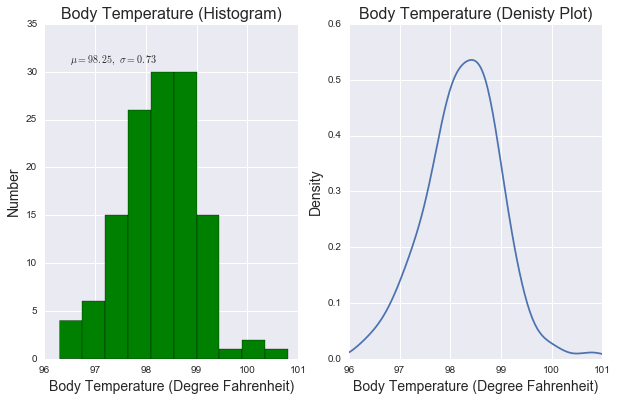

In [6]:
fig = plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.hist(df_temp,facecolor='g',edgecolor="k")
plt.title("Body Temperature (Histogram)",fontsize=16)
plt.text(96.5, 31, r'$\mu=98.25,\ \sigma=0.73$')
plt.xlabel("Body Temperature (Degree Fahrenheit)",fontsize=14)
plt.ylabel("Number",fontsize=14)
plt.ylim(0,35)
plt.grid(True)

plt.subplot(1,2,2)
density = stats.gaussian_kde(df.temperature)
xs = np.linspace(96,101,200)
plt.plot(xs,density(xs))
plt.title("Body Temperature (Denisty Plot)",fontsize=16)
plt.xlabel("Body Temperature (Degree Fahrenheit)",fontsize=14)
plt.ylabel("Density",fontsize=14)

Now lets look at the sample standar error:

In [7]:
SE = df.temperature.std()/np.sqrt(df.temperature.count())
SE

0.06430441683789101

In [8]:
(df.temperature.mean() - 2 * SE,df.temperature.mean() + 2 * SE)

(98.120621935554993, 98.377839602906562)

The sample standard error (SE) suggests the 95% confidence interval for the mean body temperature is [98.12,98.38]

The density plot shows it is bell-shaped and near symmetric

Lets plot the standardized score and the corresponding normal score (QQ plot). If the sample data has normal distribution, we will have a straight diagonal line

In [9]:
df_temp = (df_temp - Tmean)/Tstd

In [10]:
norm_data = np.random.normal(0,1,len(df_temp)) 
norm_data.sort()

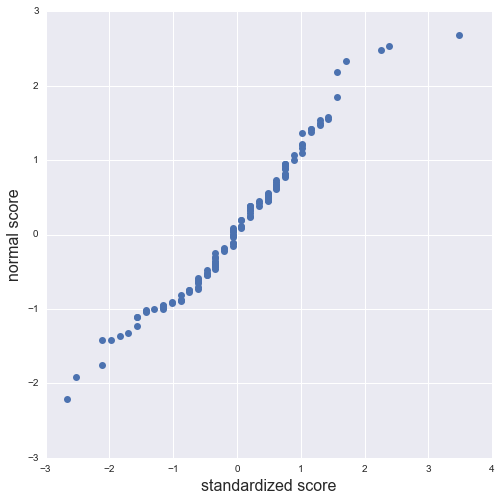

In [11]:
plt.figure(figsize=(8,8),facecolor='1.0') 
plt.plot(df_temp,norm_data,"o")
plt.xlabel("standardized score",fontsize=16)
plt.ylabel("normal score",fontsize=16)
plt.show()

The CI and QQ plot show a normally distribution of the sample data

**2. Is the sample size large? Are the observations independent?**

The sample size (n = 130) is good enough to test the body temperature hypothesis. The observations are independent since no individual measurement affects another one

**3. Is the true population mean really 98.6 degree fahrenheit?**

Ho: The true population mean is 98.6 degree fahrenheit <br/>
Ha: The true population mean is different from 98.6 degree fahrenheit

Assuming the null hypothesis is true, let's see what is the probability of finding 98.25. Given a sample standard deviation of 0.73 and large sample size of 130 (>100), the population standard deviation can be approximate by $$Tstd/ \sqrt{Tsize}$$

In [12]:
Pstd = 0.73/np.sqrt(130)
Pstd

0.064025235409413128

Since the sample size is large and normally distributed, **z-test is more appropriate** in this case

In [13]:
z_score = (98.25 - 98.60)/0.064
z_score

-5.468749999999911

Therefore the sample mean is 5.46 standard deviation away from 98.60. 99.7% of data lies within 3 standard deviations.
The probability of getting an event 5.46 standard deviation away is much less than 3%. The result favors the alternative hypothesis.

Since we are comparing the sample mean to a null hypothesis value, **this is a 1-sample test**

Now lets compare the p-value from z_score (normal distribution) and t_score (t-distribution)

In [14]:
#pval from z-score
pval = stats.norm.sf(np.abs(-5.47))*2
pval

4.5003557896537085e-08

In [15]:
#p-val from t-score
pval = stats.t.sf(np.abs(-5.47), Tsize-1)*2
pval

2.2489498605524312e-07

The p-values, whether we use z-score or t-score, is very small

**4. At what temperature should we consider someone's temperature to be "abnormal"?**

In [16]:
98.25 - 1.96 * 0.73

96.8192

In [17]:
98.25 + 1.96 * 0.73

99.6808

We have to define the confidence interval where we would say the temperature of a given individual is "abnormal". At a 95% confidence interval, we can infer an individual's temperature below (96.82) and above (99.68) as abnormal.

**5. Is there a significant difference between males and females in normal temperature?**

In [18]:
Temp_female = df[df['gender']== 'F']

In [19]:
Temp_female.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


In [20]:
Temp_male = df[df['gender']== 'M']

In [21]:
Temp_male.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


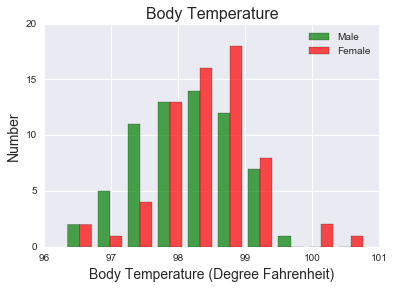

In [22]:
data = np.vstack([Temp_male.temperature, Temp_female.temperature]).T
plt.hist(data,alpha=0.7,color=['g','r'],edgecolor="k",label=['Male','Female'])
plt.title("Body Temperature",fontsize=16)
plt.xlabel("Body Temperature (Degree Fahrenheit)",fontsize=14)
plt.ylabel("Number",fontsize=14)
plt.ylim(0,20)
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

Since we are comparing two means, we use two-sample statistic

In [23]:
TOTALvar = (Temp_male.temperature.var())/65 + (Temp_female.temperature.var())/65
#TOTALstd = np.sqrt((Temp_male.temperature.var())/np.sqrt(65) + (Temp_female.temperature.var())/np.sqrt(65))
TOTALstd=np.sqrt(TOTALvar)
TOTALstd

0.12655395041982642

In [24]:
DIFFmean = Temp_male.temperature.mean() - Temp_female.temperature.mean()
DIFFmean

-0.289230769230727

In [25]:
z_score = DIFFmean/(TOTALstd)
z_score

-2.2854345381652741

In [26]:
pval = stats.norm.sf(np.abs(z_score))*2
pval

0.02228736076067726

This shows there is a low probability (2.23%) the difference observed between males and females body temperature is due to chance

The statistical analysis of the body temperature data of 65 males and 65 females contradicts the long held "fact" that the average human body temperature is 98.6 degree fahreneheit. The result shows the mean body temperature is 98.25 degree fahrenheit with a standard deviation of 0.73. Moreover, there is a statitstically significant differece between the body temperature of females (mean of 98.39 and standard deviation of 0.74 ) and males (mean of 98.10 and standard deviation of 0.70)